In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'C:\Users\16pha\myenv\datasets\train_data.csv')

In [2]:
#type of admisssion,region code, hospital type, hospital region code, and department can be changed into numerical values in any order most likely, if they are even neccessary in the dataset.
# severity, stay length, and type may need to be converted in a specific way ie 0 as least severe

In [3]:
# region code and hospital type we can do one hot encoding and with type of admission

In [4]:
data = pd.concat([data,pd.get_dummies(data['Hospital_region_code'], prefix='region')],axis=1).drop(['Hospital_region_code'],axis=1)

In [5]:
data = pd.concat([data,pd.get_dummies(data['Type of Admission'], prefix='Admission')],axis=1).drop(['Type of Admission'],axis=1)

In [6]:
replace_map = {'Stay':{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}}
data.replace(replace_map,inplace=True)
replace_map_age = {'Age':{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}}
data.replace(replace_map_age,inplace=True)
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,Visitors with Patient,Age,Admission_Deposit,Stay,region_X,region_Y,region_Z,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,1,8,c,3,3,radiotherapy,R,F,2.0,31397,...,2,5,4911.0,0,0,0,1,1,0,0
1,2,2,c,5,2,radiotherapy,S,F,2.0,31397,...,2,5,5954.0,4,0,0,1,0,1,0
2,3,10,e,1,2,anesthesia,S,E,2.0,31397,...,2,5,4745.0,3,1,0,0,0,1,0
3,4,26,b,2,2,radiotherapy,R,D,2.0,31397,...,2,5,7272.0,4,0,1,0,0,1,0
4,5,26,b,2,2,radiotherapy,S,D,2.0,31397,...,2,5,5558.0,4,0,1,0,0,1,0


gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

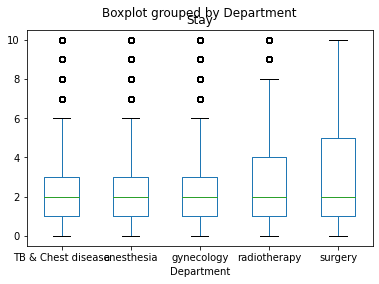

In [7]:
data.Department.unique()
data.boxplot(by = 'Department',column = 'Stay',grid = False)
data.Department.value_counts()


F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

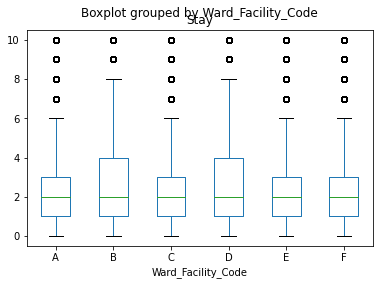

In [8]:
data['Ward_Facility_Code'].unique()
data.boxplot(by = 'Ward_Facility_Code',column = 'Stay',grid = False)
data['Ward_Facility_Code'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

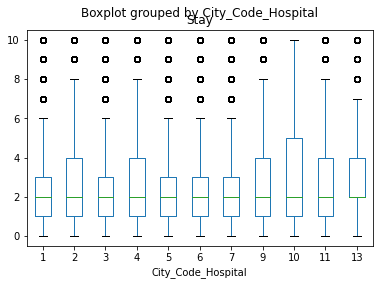

In [9]:
data['City_Code_Hospital'].unique()
data.boxplot(by = 'City_Code_Hospital',column = 'Stay',grid = False)
data['City_Code_Hospital'].value_counts()

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

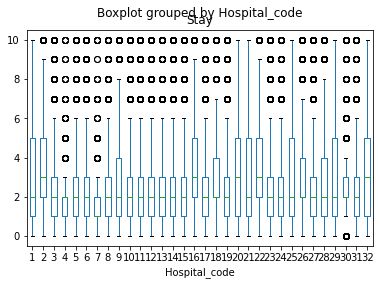

In [10]:
data['Hospital_code'].unique()
data.boxplot(by = 'Hospital_code',column = 'Stay',grid = False)
data['Hospital_code'].value_counts()

In [11]:
drop_cols = ['case_id','patientid','City_Code_Hospital', 'City_Code_Patient','Ward_Facility_Code','Department','Hospital_code']
data.drop(drop_cols,axis=1,inplace = True)

['c' 'e' 'b' 'a' 'f' 'd' 'g']


a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

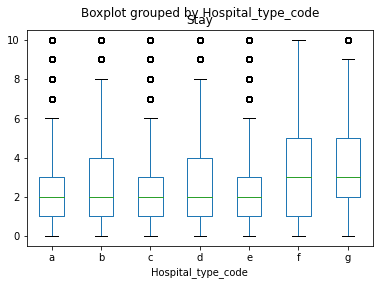

In [12]:
print(data['Hospital_type_code'].unique())
data.boxplot(by = 'Hospital_type_code',column = 'Stay',grid = False)
data['Hospital_type_code'].value_counts()

In [13]:
replace_map_code = {'Hospital_type_code':{'a':0, 'b':1,'c':2,'d':3,'e':4,'f':5,'g':6}}
data.replace(replace_map_code,inplace=True)
data.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Ward_Type,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,region_X,region_Y,region_Z,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,2,3,R,2.0,Extreme,2,5,4911.0,0,0,0,1,1,0,0
1,2,2,S,2.0,Extreme,2,5,5954.0,4,0,0,1,0,1,0
2,4,2,S,2.0,Extreme,2,5,4745.0,3,1,0,0,0,1,0
3,1,2,R,2.0,Extreme,2,5,7272.0,4,0,1,0,0,1,0
4,1,2,S,2.0,Extreme,2,5,5558.0,4,0,1,0,0,1,0


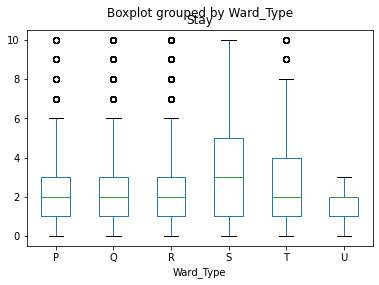

In [14]:
data.boxplot(by = 'Ward_Type',column = 'Stay',grid = False)

In [15]:
data['Ward_Type'].value_counts() # s is an extreme outlier in this case

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [16]:
replace_map_type = {'Ward_Type':{'R':0,'P':0,'Q':0,'S':1,'T':0,"U":0}}
data.replace(replace_map_type,inplace=True)
data.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Ward_Type,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,region_X,region_Y,region_Z,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,2,3,0,2.0,Extreme,2,5,4911.0,0,0,0,1,1,0,0
1,2,2,1,2.0,Extreme,2,5,5954.0,4,0,0,1,0,1,0
2,4,2,1,2.0,Extreme,2,5,4745.0,3,1,0,0,0,1,0
3,1,2,0,2.0,Extreme,2,5,7272.0,4,0,1,0,0,1,0
4,1,2,1,2.0,Extreme,2,5,5558.0,4,0,1,0,0,1,0


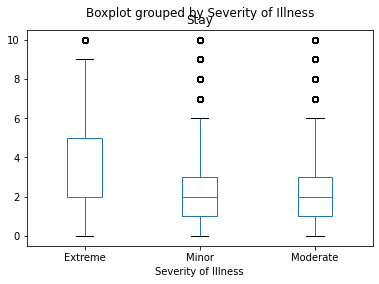

In [17]:
data.boxplot(by = 'Severity of Illness',column = 'Stay',grid = False)

In [18]:
replace_map_severity = {'Severity of Illness':{'Extreme':2,'Moderate':1,'Minor':0}}
data.replace(replace_map_severity,inplace=True)
data.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Ward_Type,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,region_X,region_Y,region_Z,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,2,3,0,2.0,2,2,5,4911.0,0,0,0,1,1,0,0
1,2,2,1,2.0,2,2,5,5954.0,4,0,0,1,0,1,0
2,4,2,1,2.0,2,2,5,4745.0,3,1,0,0,0,1,0
3,1,2,0,2.0,2,2,5,7272.0,4,0,1,0,0,1,0
4,1,2,1,2.0,2,2,5,5558.0,4,0,1,0,0,1,0


In [19]:
data.dtypes
data.dropna(inplace=True)
data.isnull().values.any()

False

In [20]:
data = data.astype('int32')
data.dtypes

Hospital_type_code                   int32
Available Extra Rooms in Hospital    int32
Ward_Type                            int32
Bed Grade                            int32
Severity of Illness                  int32
Visitors with Patient                int32
Age                                  int32
Admission_Deposit                    int32
Stay                                 int32
region_X                             int32
region_Y                             int32
region_Z                             int32
Admission_Emergency                  int32
Admission_Trauma                     int32
Admission_Urgent                     int32
dtype: object

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, data.columns != 'Stay'], data['Stay'], random_state=0)

In [22]:
X_train.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Ward_Type,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,region_X,region_Y,region_Z,Admission_Emergency,Admission_Trauma,Admission_Urgent
278357,0,4,0,4,0,4,7,5923,1,0,0,0,1,0
295450,0,3,1,3,1,4,1,6145,1,0,0,0,0,1
68767,0,3,0,3,2,3,7,5851,1,0,0,0,1,0
1717,2,4,0,2,1,2,3,4704,0,0,1,0,1,0
239834,0,3,0,2,1,2,1,4929,0,0,1,0,1,0


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np
stay_predictions = lin_reg.predict(X_test) 
lin_mse = mean_squared_error(Y_test, stay_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1.7230911808947968


In [33]:
print("\033[1m" + 'this method does not give the required metric accuracy score so for the next algorithm ill do a categoric one.' + "\033[0m")

this method does not give the required metric accuracy score so for the next algorithm ill do a categoric one.


In [39]:
#random forest algorithm 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest.fit(X_train,Y_train)
forest_predictions = forest.predict(X_test)

In [40]:
print(forest_predictions)

[2 1 1 ... 1 1 2]


In [41]:
print(Y_test)

85923     1
146814    2
59795     2
100098    2
225432    3
         ..
302578    1
49662     3
265471    0
30277     3
175714    1
Name: Stay, Length: 79582, dtype: int32


In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(forest_predictions,Y_test) * 100
print(acc)

36.881455605538946


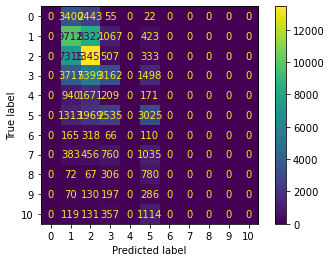

In [44]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(forest, X_test, Y_test)
plt.show()